In [201]:
%load_ext autoreload
%autoreload 2

from pyro import sample, plate

from scipy.linalg import null_space, lstsq

from src.data.datasets import SiteDataset
import torch
import seaborn as sns
import pyro
from src.data.datasets import SiteDataset
from src.models.initial_model import InitialModel, TraceGuide
from pyro import distributions as dist

site_data = SiteDataset("5a0546857ecc773753327266")
floor = site_data.floors[0]
height, width = floor.info["map_info"]["height"], floor.info["map_info"]["width"]
floor_uniform = dist.Uniform(
    low=torch.tensor([0.0, 0.0]), high=torch.tensor([height, width])
).to_event(1)

trace = floor.traces[18]
matrices = trace.matrices
time = torch.tensor(matrices["time"])
wifi = torch.tensor(matrices["wifi"])
position = torch.tensor(matrices["position"])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$
x(t) = \beta_0 + \sum_{i=0}^{10} \alpha_i h( t - \gamma_i)
$$

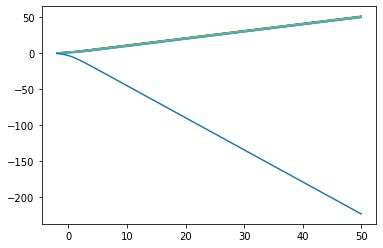

In [225]:

tg = TraceGuide()
tg.to(dtype=torch.double);

parameters = dict(tg.named_parameters())

import matplotlib.pyplot as plt

with torch.autograd.no_grad():
    tt = torch.linspace(-2, 50, 100)
    yy = torch.nn.functional.softplus((tt * torch.ones_like(parameters["0.weight"]) ).T + parameters["0.bias"])
    coeffs = torch.randn(10)
    for i in range(10):
        sns.lineplot(x=tt, y=yy[:,i])
    sns.lineplot(x=tt, y=(yy * coeffs ).sum(axis=1))

In [224]:
# model = InitialModel(trace)

# from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
# from pyro.optim import Adam, ClippedAdam


# # Reset parameter values
# pyro.clear_param_store()

# Define the number of optimization steps
n_steps = 1000

# # Setup the optimizer
# adam_params = {"lr": 0.01}
# optimizer = Adam(adam_params)

# # Setup the inference algorithm
# elbo = Trace_ELBO(num_particles=3)
# svi = SVI(model.model, model.guide, optimizer, loss=elbo)

# Do gradient steps
for step in range(n_steps):
    elbo = svi.step()

    print("[%d] ELBO: %.1f" % (step, elbo))

/Users/soren/Documents/DTU/Semester10/42186/indoor-location-navigation.nosync/.venv/lib/python3.9/site-packages/pyro/primitives.py:404: UserWarning: trace_guide._forward_x.0.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(f"{param_name} was not registered in the param store "
/Users/soren/Documents/DTU/Semester10/42186/indoor-location-navigation.nosync/.venv/lib/python3.9/site-packages/pyro/primitives.py:404: UserWarning: trace_guide._forward_y.0.weight was not registered in the param store because requires_grad=False. You can silence this warning by calling my_module.train(False)
  warnings.warn(f"{param_name} was not registered in the param store "
[0] ELBO: 45039395.9
[1] ELBO: 44897552.4
[2] ELBO: 44893159.1
[3] ELBO: 44981185.3
[4] ELBO: 44783018.0
[5] ELBO: 44866923.3
[6] ELBO: 44784129.7
[7] ELBO: 44555689.7
[8] ELBO: 44727333.8
[9] ELBO: 44932678.8
[10] ELBO: 44601264.5
[11]

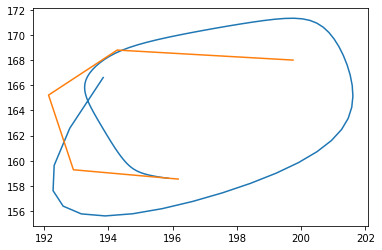

In [223]:
with torch.autograd.no_grad():

    tt = torch.linspace(model.time[0], model.time[model.position_is_observed[-1]], 100)
    loc, scale = model.trace_guide(tt.view(-1, 1 ))
    sns.lineplot(x=loc[:, 0], y=loc[:, 1], sort=False)
    sns.lineplot(x=model.position[:, 0], y=model.position[:, 1], sort=False)
